In [ ]:
import numpy as np
import pandas as pd
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import operator
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
#Loading all datasets

confirmed = pd.read_csv('time_series_covid19_confirmed.csv')
death = pd.read_csv('time_series_covid19_deaths.csv')
recovered = pd.read_csv('time_series_covid19_recovered.csv')

In [ ]:
test = pd.read_csv('2019_nCoV_data.csv')

In [ ]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4


In [ ]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [ ]:
#PREPROCESSING
#Extracting all the columns using the .keys() function 

cols = confirmed.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020', '2/1/2020',
       '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020', '2/7/2020',
       '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020',
       '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020',
       '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020',
       '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020',
       '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020',
       '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020',
       '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020',
       '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020',
       '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020',
       '3/25/2020', '3/26/2020'],
      dtype='object')

In [ ]:
#Extracting only the dates columns confirmed, death, and recovery cases

confirm = confirmed.loc[:,cols[4]:cols[-1]]

In [ ]:
deaths = death.loc[:,cols[4]:cols[-1]]
recoveries = recovered.loc[:,cols[4]:cols[-1]]

In [ ]:
confirm.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4


In [ ]:
#Finding total confirmed, death, and recovered cases and calculating the mortality rate

dates = confirm.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
  confirm_sum = confirm[i].sum()
  death_sum = deaths[i].sum()
  recover_sum = recoveries[i].sum()
  world_cases.append(confirm_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirm_sum)
  total_recovered.append(recover_sum)

In [ ]:
confirm_sum

529591

In [ ]:
death_sum

23970

In [ ]:
recover_sum

122150

In [ ]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242500,
 272035,
 304396,
 336953,
 378235,
 418045,
 467653,
 529591]

In [ ]:
#Converting to numpy arrays

days = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [ ]:
days

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [ ]:
world_cases

array([[   555],
       [   654],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30794],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76819],
       [ 78572],
       [ 78958],
       [ 79561],
       [ 80406],
       [ 81388],
       [ 82746],
       [ 84112],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97886],
       [101801],
       [105847],
       [109821],
       [113590],
       [118620],
       [125875],
       [128352],
       [145205],
       [156101],
       [167454],
       [181574],
       [197102],
       [214821],
       [242500],
       [272035

In [ ]:
total_deaths

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [ ]:
total_recovered

array([[    28],
       [    30],
       [    36],
       [    39],
       [    52],
       [    61],
       [   107],
       [   126],
       [   143],
       [   222],
       [   284],
       [   472],
       [   623],
       [   852],
       [  1124],
       [  1487],
       [  2011],
       [  2616],
       [  3244],
       [  3946],
       [  4683],
       [  5150],
       [  6295],
       [  8058],
       [  9395],
       [ 10865],
       [ 12583],
       [ 14352],
       [ 16121],
       [ 18177],
       [ 18890],
       [ 22886],
       [ 23394],
       [ 25227],
       [ 27905],
       [ 30384],
       [ 33277],
       [ 36711],
       [ 39782],
       [ 42716],
       [ 45602],
       [ 48228],
       [ 51170],
       [ 53796],
       [ 55865],
       [ 58358],
       [ 60694],
       [ 62494],
       [ 64404],
       [ 67003],
       [ 68324],
       [ 70251],
       [ 72624],
       [ 76034],
       [ 78088],
       [ 80840],
       [ 83312],
       [ 84975],
       [ 87420

In [ ]:
#Future forecasting for the next 10 days

days_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [ ]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74]])

In [ ]:
#Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_date = []
for i in range(len(future_forecast)):
  future_forecast_date.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
#Finding latest confirmed, death, and recovered cases

latest_C = confirmed[dates[-1]]
latest_D = deaths[dates[-1]]
latest_R = recovered[dates[-1]]

In [ ]:
latest_C

0       94
1      174
2      367
3      224
4        4
      ... 
243      4
244      2
245      1
246      3
247     71
Name: 3/26/2020, Length: 248, dtype: int64

In [ ]:
latest_D

0       4
1       6
2      25
3       3
4       0
       ..
243     0
244     0
245     0
246     0
247     1
Name: 3/26/2020, Length: 248, dtype: int64

In [ ]:
latest_R

0       2
1      17
2      29
3       1
4       0
       ..
229     0
230     0
231    17
232     0
233     0
Name: 3/26/2020, Length: 234, dtype: int64

In [ ]:
#Finding all the unique countries

unique_countries = list(confirmed['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [ ]:
#Calculating Total number of Confirmed cases by each countries 

country_confirm_cases = []
no_cases = []
for i in unique_countries:
  cases = latest_C[confirmed['Country/Region']==i].sum()
  if cases>0:
    country_confirm_cases.append(cases)
  else:
    no_cases.ppend(i)
for i in no_cases:
  unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirm_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
  country_confirm_cases[i] = latest_C[confirmed['Country/Region']==unique_countries[i]].sum()

In [ ]:
# Number of cases per Country/Region

print('Country/Region wise confirmrd cases:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {country_confirm_cases[i]} cases')

Country/Region wise confirmrd cases:
US: 83836 cases
China: 81782 cases
Italy: 80589 cases
Spain: 57786 cases
Germany: 43938 cases
France: 29551 cases
Iran: 29406 cases
United Kingdom: 11812 cases
Switzerland: 11811 cases
Korea, South: 9241 cases
Netherlands: 7468 cases
Austria: 6909 cases
Belgium: 6235 cases
Canada: 4042 cases
Turkey: 3629 cases
Portugal: 3544 cases
Norway: 3369 cases
Brazil: 2985 cases
Sweden: 2840 cases
Australia: 2810 cases
Israel: 2693 cases
Malaysia: 2031 cases
Denmark: 2023 cases
Czechia: 1925 cases
Ireland: 1819 cases
Luxembourg: 1453 cases
Ecuador: 1403 cases
Japan: 1387 cases
Chile: 1306 cases
Poland: 1221 cases
Pakistan: 1201 cases
Thailand: 1045 cases
Romania: 1029 cases
Saudi Arabia: 1012 cases
Finland: 958 cases
South Africa: 927 cases
Indonesia: 893 cases
Greece: 892 cases
Russia: 840 cases
Iceland: 802 cases
India: 727 cases
Diamond Princess: 712 cases
Philippines: 707 cases
Singapore: 683 cases
Peru: 580 cases
Slovenia: 562 cases
Panama: 558 cases
Qata

In [ ]:
#Finding all the unique provinces/state

unique_province = list(confirmed['Province/State'].unique())

In [ ]:
#Finding the number of cases per province/state

province_confirm_cases = []
no_cases = []
for i in unique_province:
  cases = latest_C[confirmed['Province/State']==i].sum()
  if cases > 0:
    province_confirm_cases.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
    unique_province.remove(i)

In [ ]:
for i in range(len(unique_province)):
  print(f'{unique_province[i]}: {province_confirm_cases[i]} cases')

Australian Capital Territory: 53 cases
New South Wales: 1219 cases
Northern Territory: 12 cases
Queensland: 493 cases
South Australia: 235 cases
Tasmania: 47 cases
Victoria: 520 cases
Western Australia: 231 cases
Alberta: 486 cases
British Columbia: 725 cases
Grand Princess: 13 cases
Manitoba: 36 cases
New Brunswick: 33 cases
Newfoundland and Labrador: 82 cases
Nova Scotia: 73 cases
Ontario: 858 cases
Prince Edward Island: 5 cases
Quebec: 1632 cases
Saskatchewan: 95 cases
Anhui: 990 cases
Beijing: 566 cases
Chongqing: 578 cases
Fujian: 328 cases
Gansu: 136 cases
Guangdong: 1448 cases
Guangxi: 254 cases
Guizhou: 146 cases
Hainan: 168 cases
Hebei: 319 cases
Heilongjiang: 484 cases
Henan: 1275 cases
Hong Kong: 453 cases
Hubei: 67801 cases
Hunan: 1018 cases
Inner Mongolia: 89 cases
Jiangsu: 640 cases
Jiangxi: 936 cases
Jilin: 95 cases
Liaoning: 128 cases
Macau: 31 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 253 cases
Shandong: 771 cases
Shanghai: 451 cases
Shanxi: 135 cases
Sichuan:

In [ ]:
#Handling nun values if there are any

nun_indices = []

for i in range(len(unique_province)):
  if type(unique_province[i])==float:
    nun_indices.append(i)

unique_province = list(unique_province)
province_confirm_cases = list(province_confirm_cases) 

for i in nun_indices:
  unique_province.pop(i)
  province_confirm_cases.pop(i)

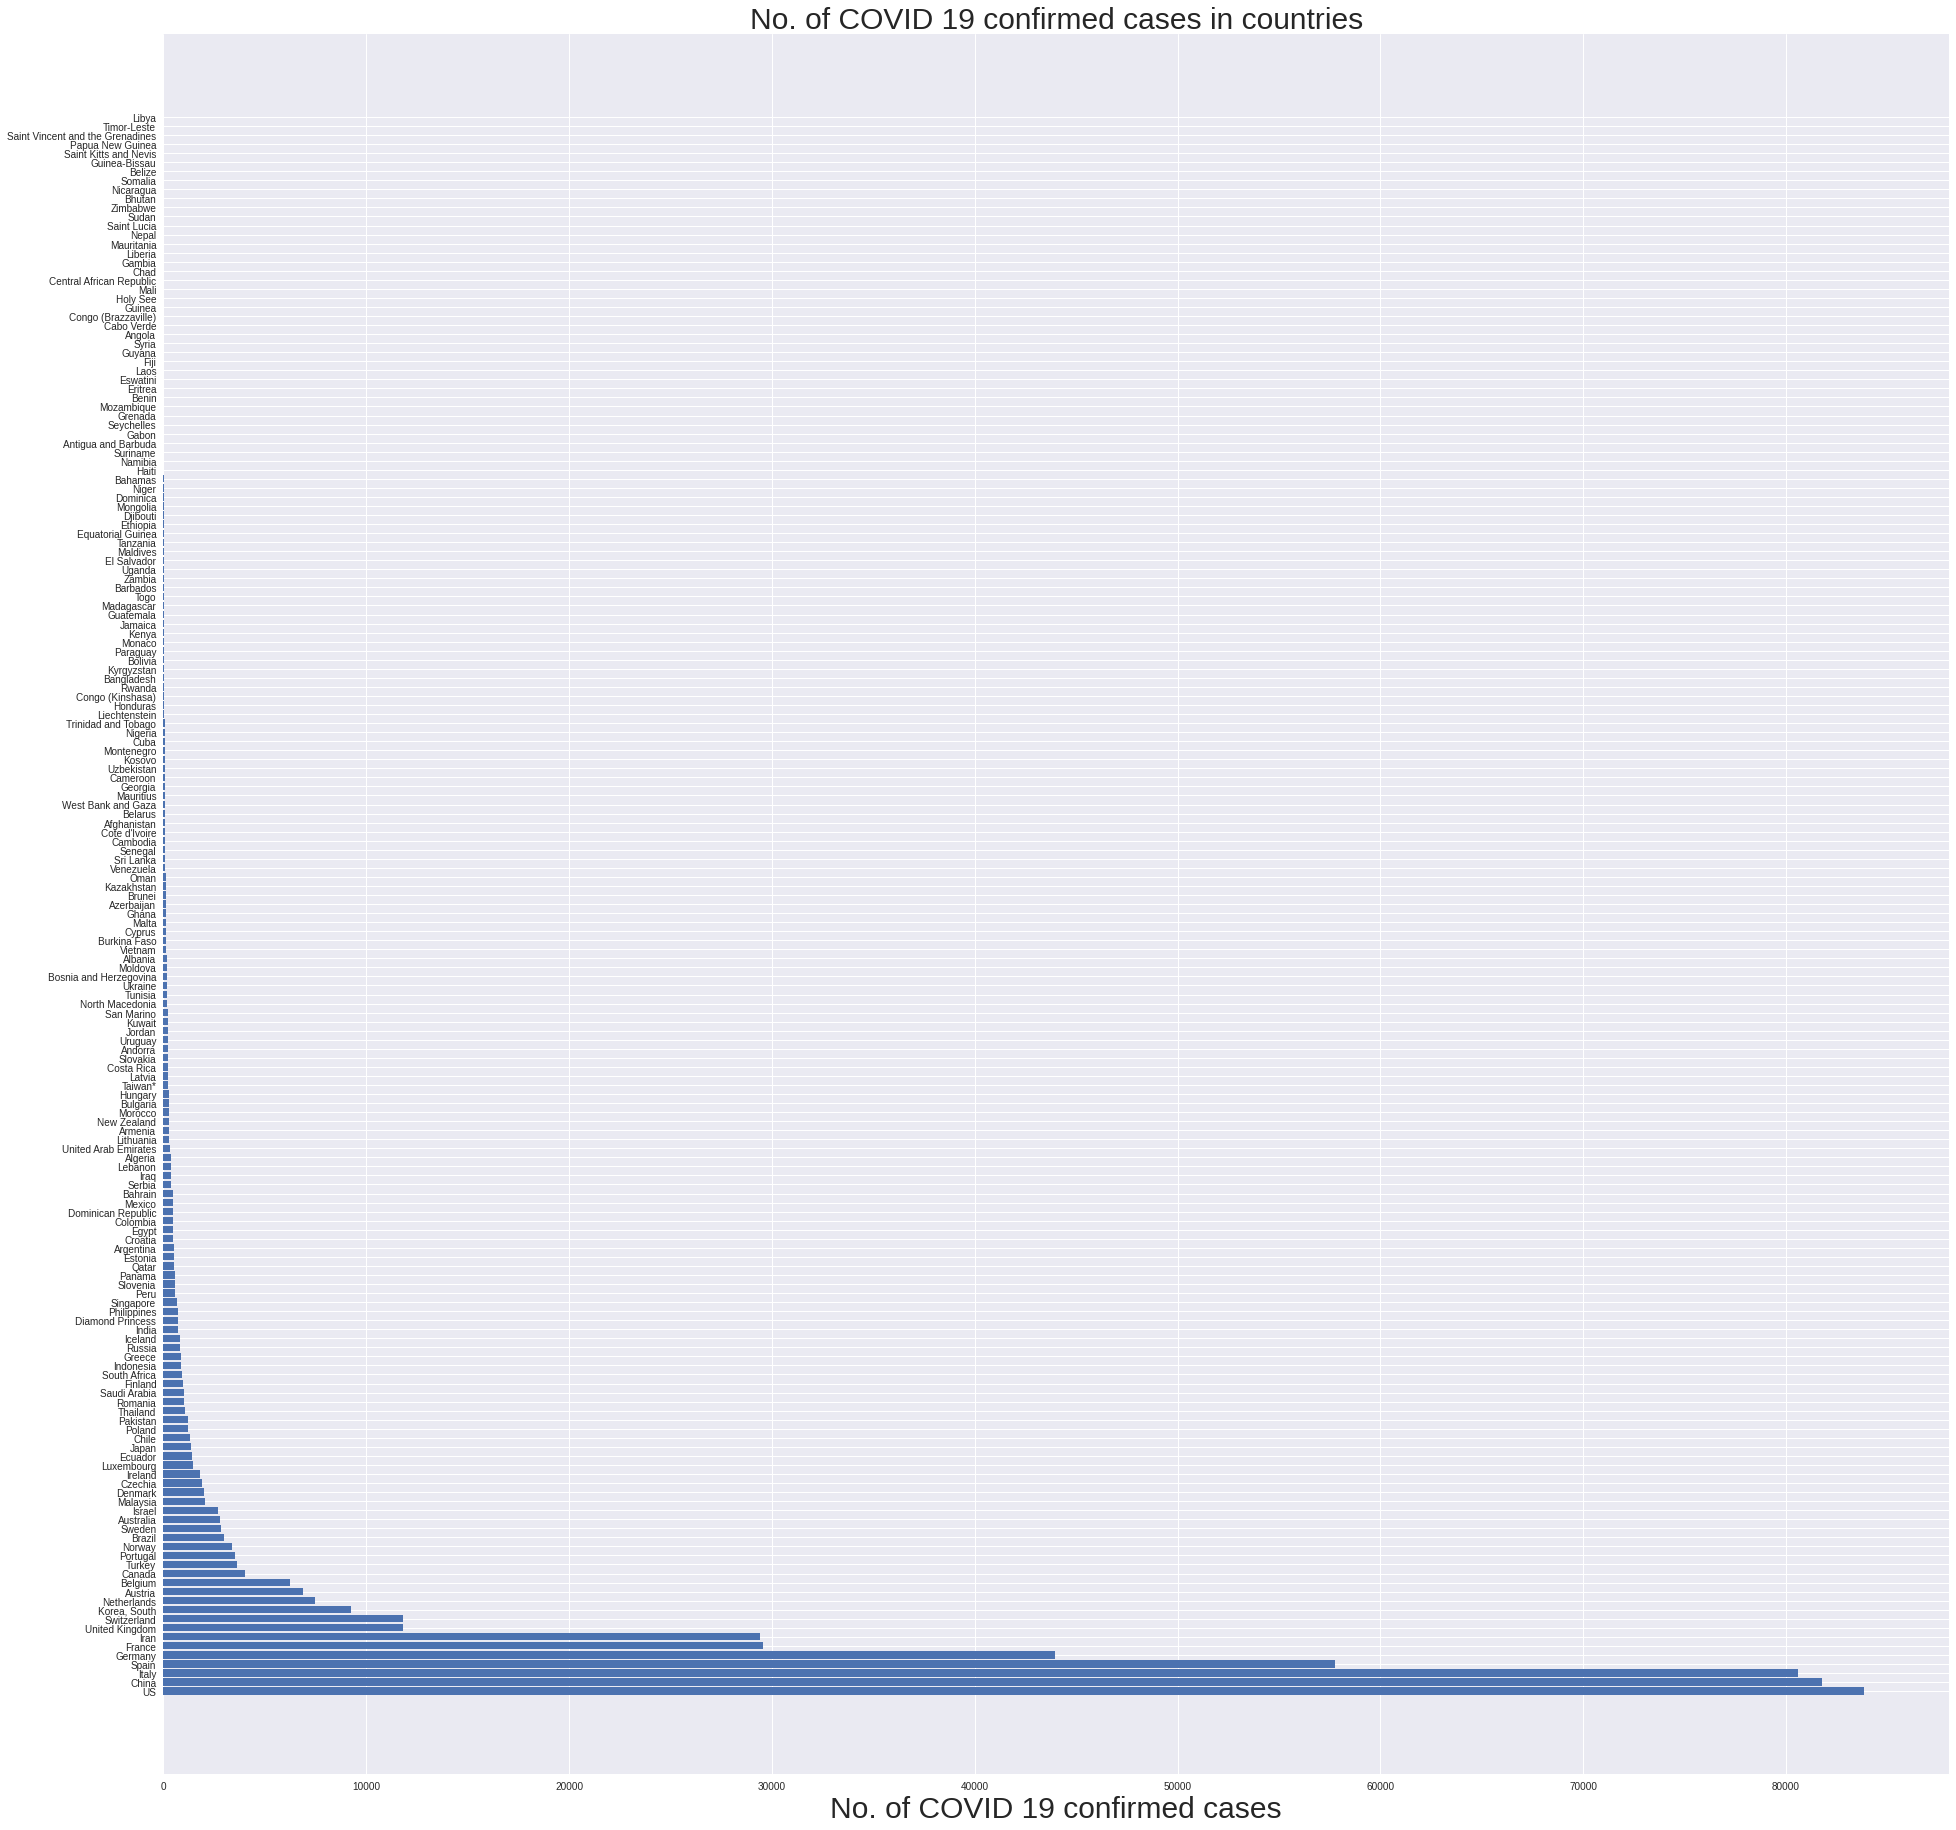

In [ ]:
#Ploting bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirm_cases)
plt.title('No. of COVID 19 confirmed cases in countries',size=30)
plt.xlabel('No. of COVID 19 confirmed cases',size=30)
plt.show()

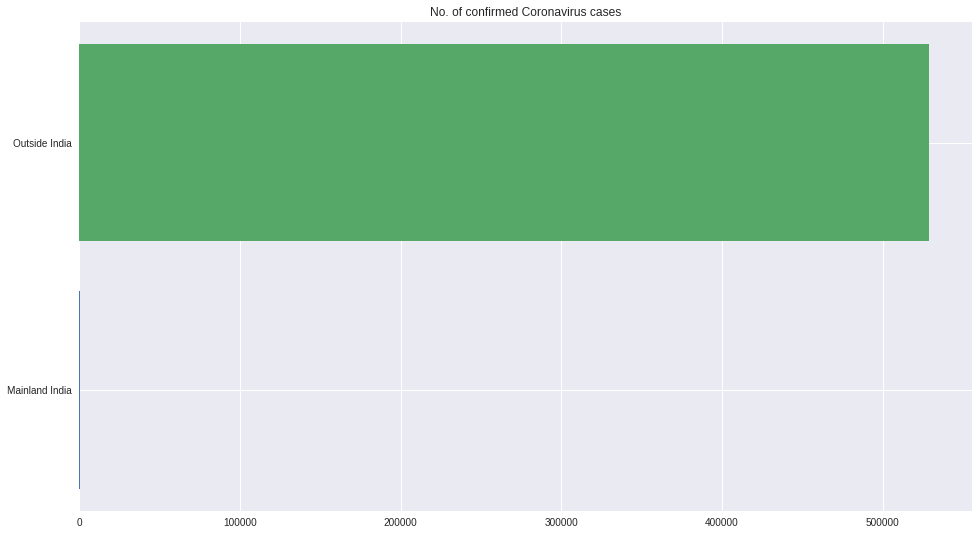

In [ ]:
#Ploting a bar graph to see the total confirmed cases between Mainland India and Outside India

india_confirmed = latest_C[confirmed['Country/Region']=='India'].sum()
outside_india = np.sum(country_confirm_cases) - india_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland India', india_confirmed)
plt.barh('Outside India', outside_india)
plt.title('No. of confirmed Coronavirus cases')
plt.show()

In [ ]:
print('Outside India: {} cases'.format(outside_india))
print('Mainland India: {} cases '.format(india_confirmed))
print('Total: {} cases'.format(india_confirmed+outside_india))

Outside India: 528864 cases
Mainland India: 727 cases 
Total: 529591 cases


In [ ]:
#To show 10 countries with the most confirmed cases and the rest grouped as others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirm_cases[10:])
for i in range(len(country_confirm_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirm_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

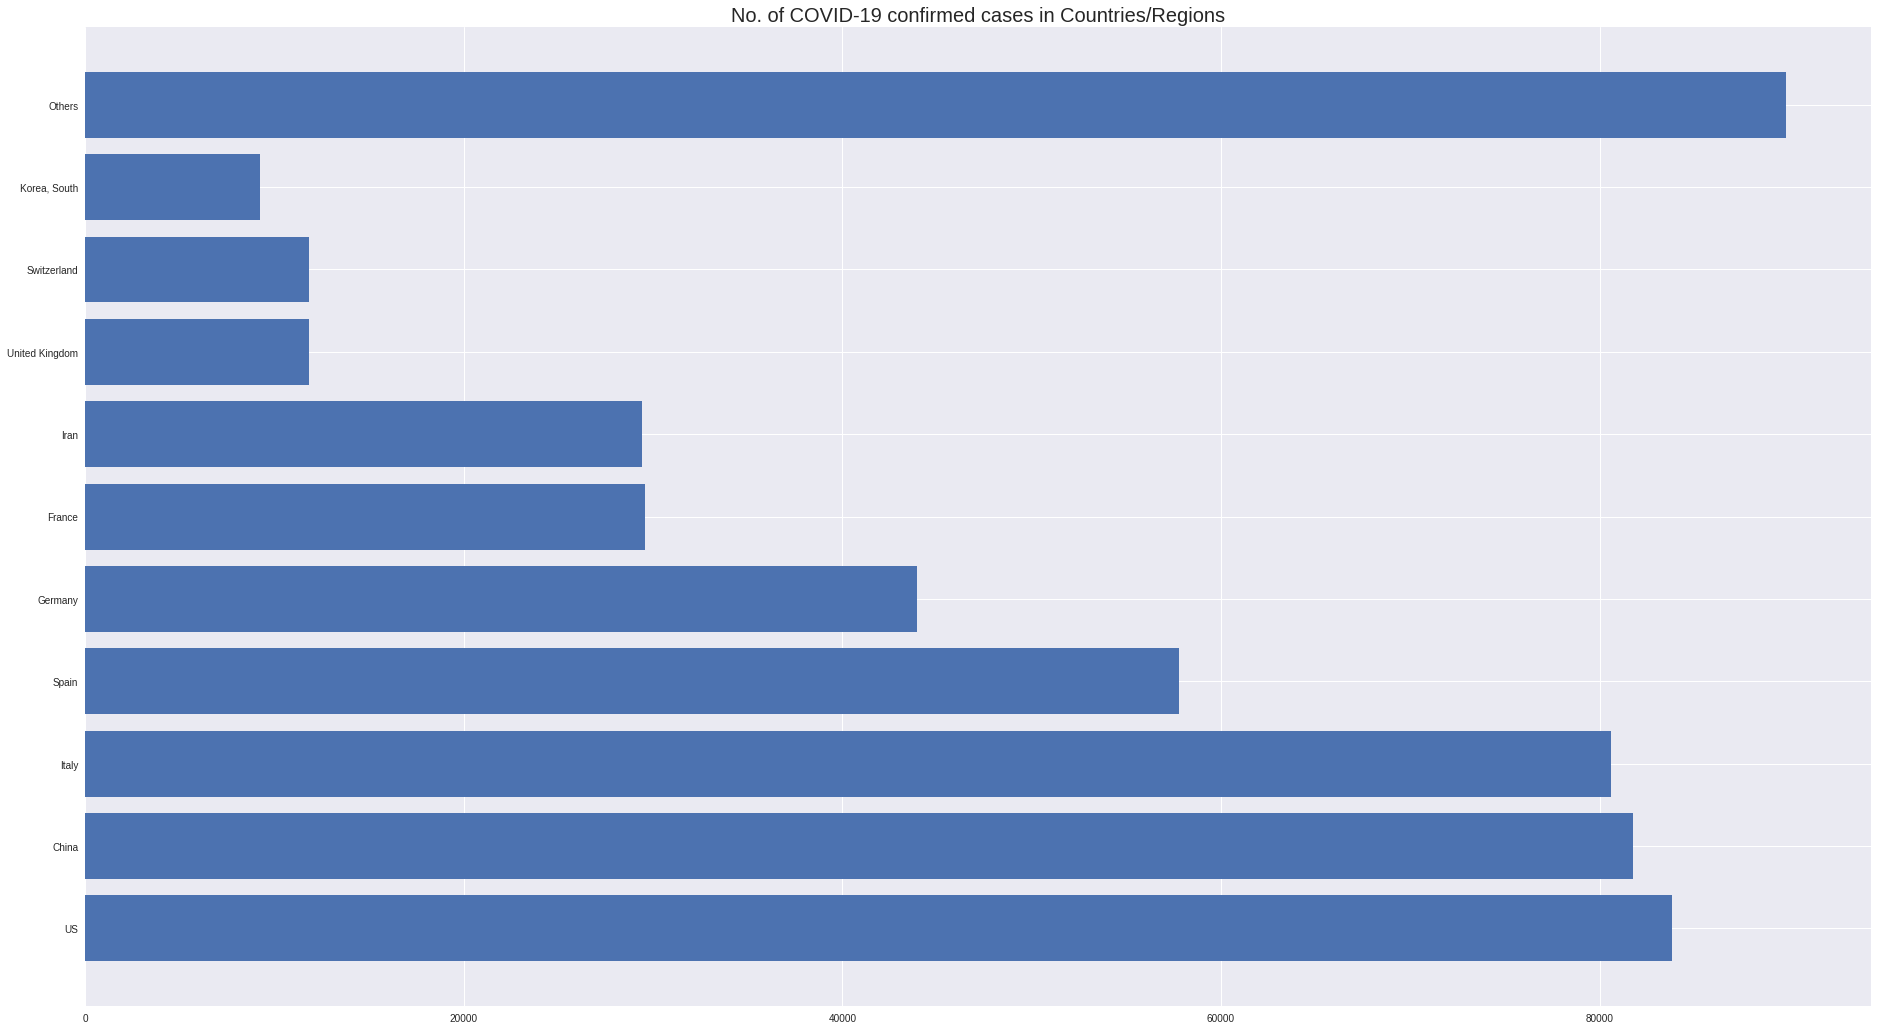

In [ ]:
#Ploting bar graph for the above condition

plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('No. of COVID-19 confirmed cases in Countries/Regions', size=20)
plt.show()

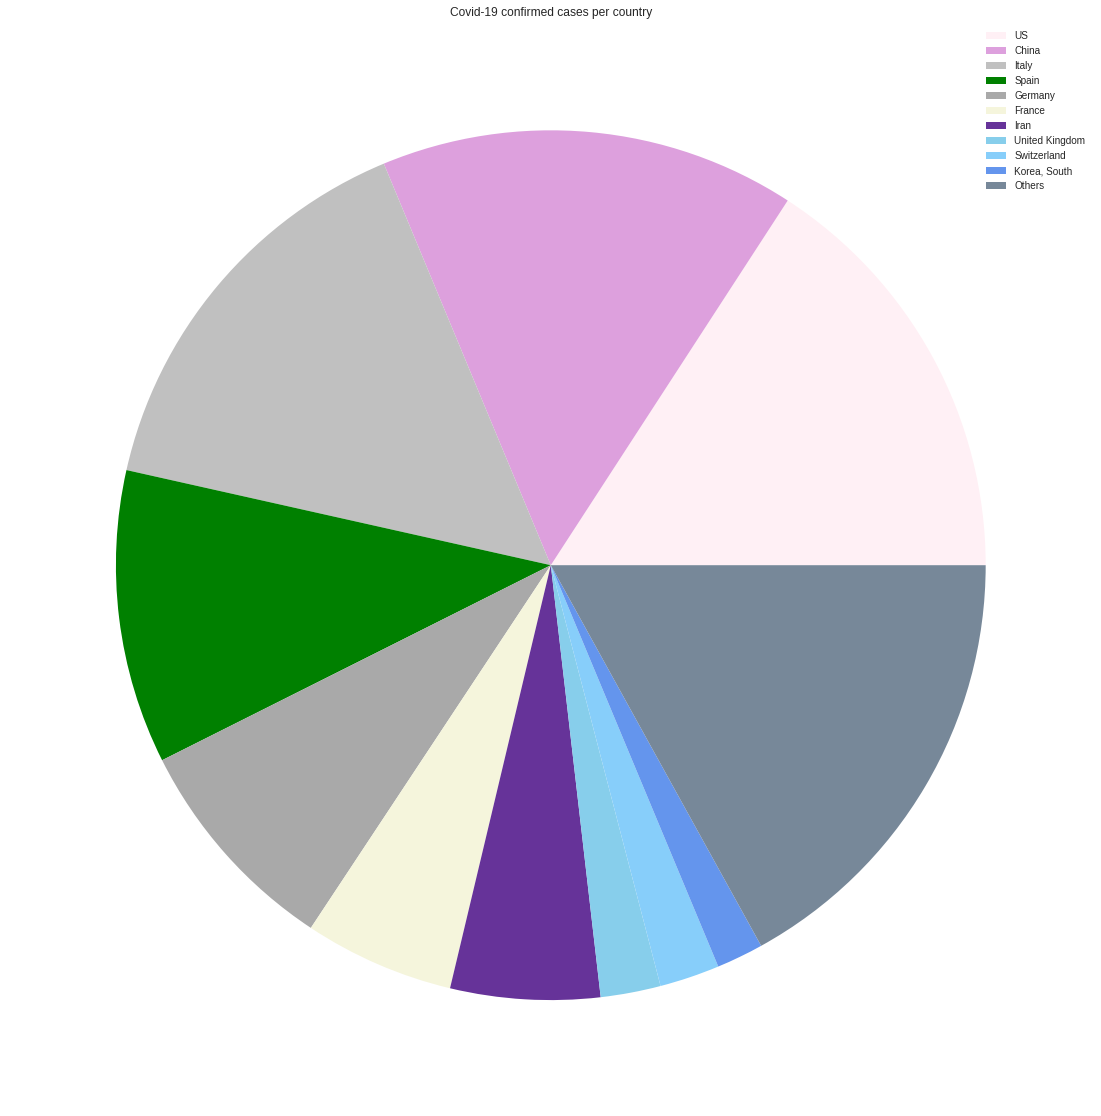

In [ ]:
#Creating pie chart to see the total confirmed cases for 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 confirmed cases per country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

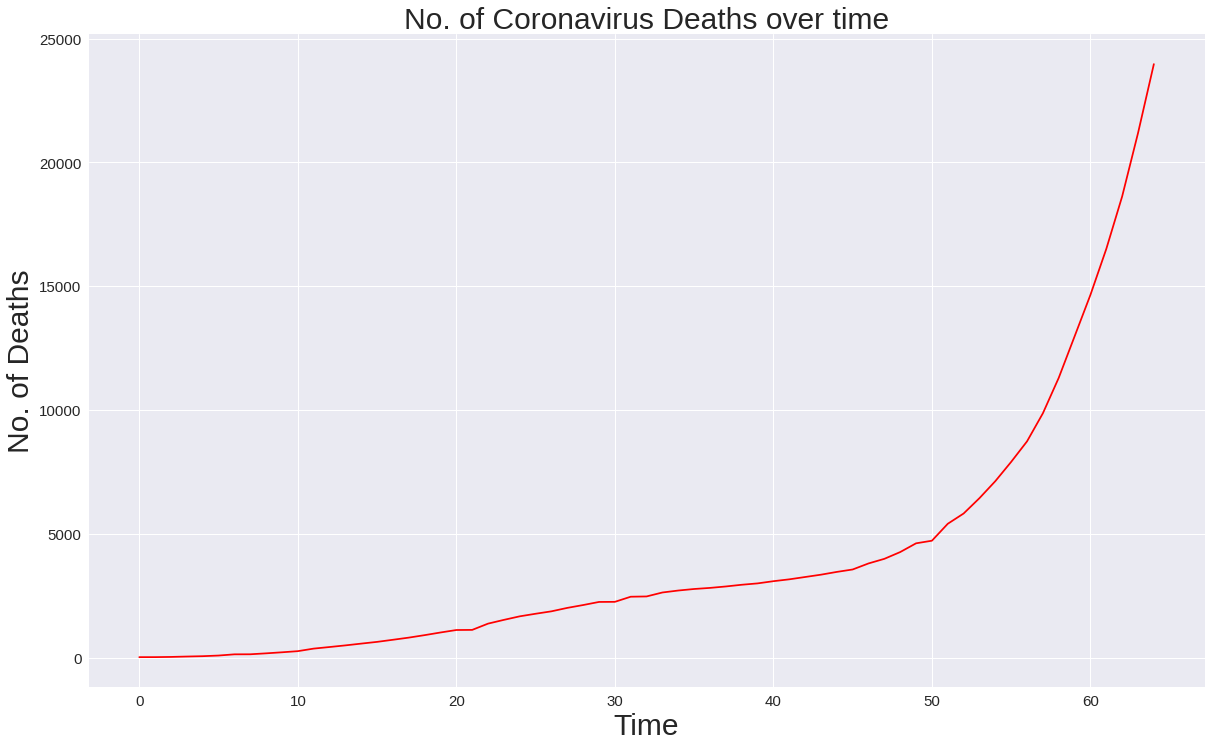

In [ ]:
#Total deaths over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('No. of Coronavirus Deaths over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('No. of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

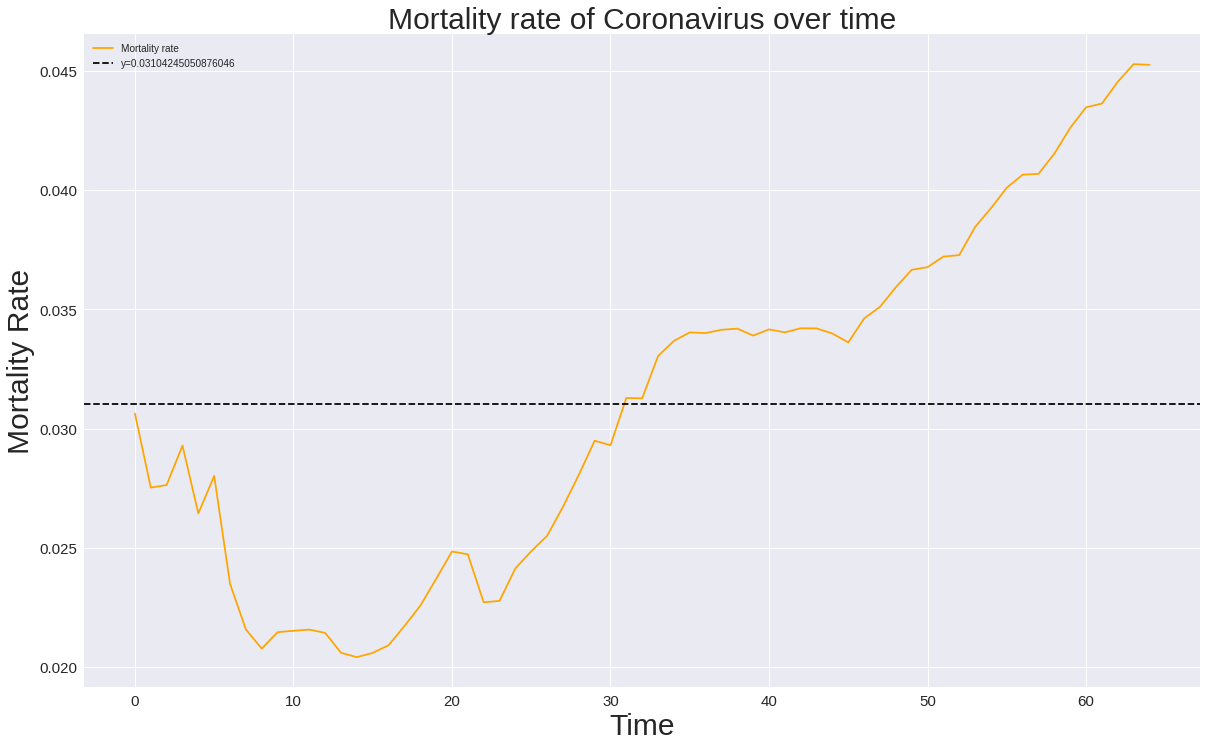

In [ ]:
#Mortality rate of Coronavirus over time

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality rate of Coronavirus over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.legend(['Mortality rate', 'y='+str(mean_mortality_rate)])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

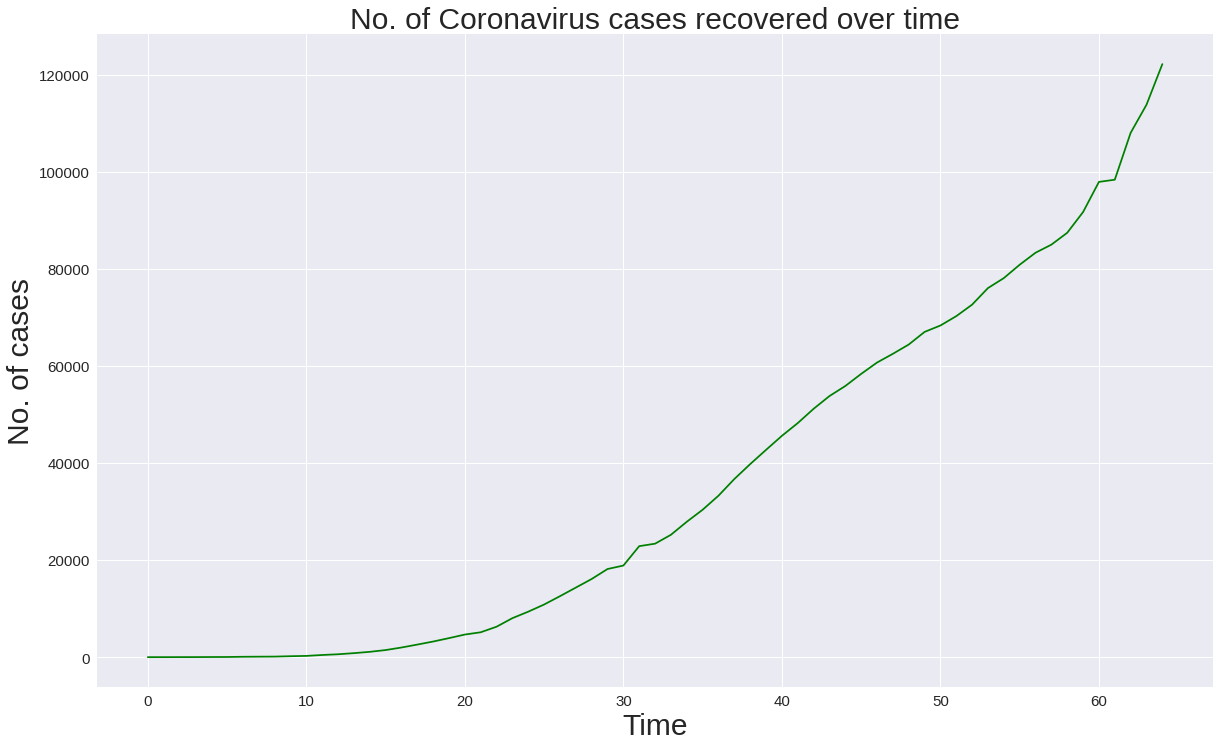

In [ ]:
#Total no. of cases recovered over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('No. of Coronavirus cases recovered over time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('No. of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

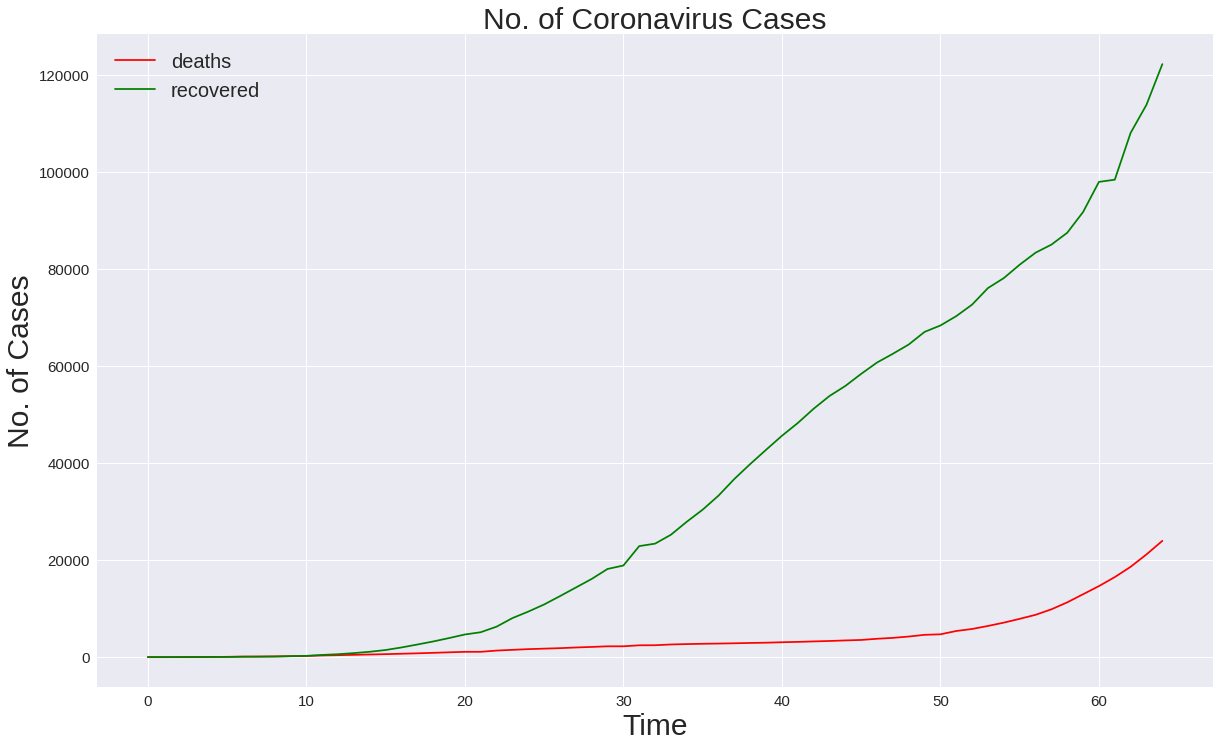

In [ ]:
#No. of Coronavirus cases recovered vs the number of deaths

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('No. of Coronavirus Cases', size=30)
plt.legend(['deaths','recovered'], loc='best', fontsize=20)
plt.xlabel('Time', size=30)
plt.ylabel('No. of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

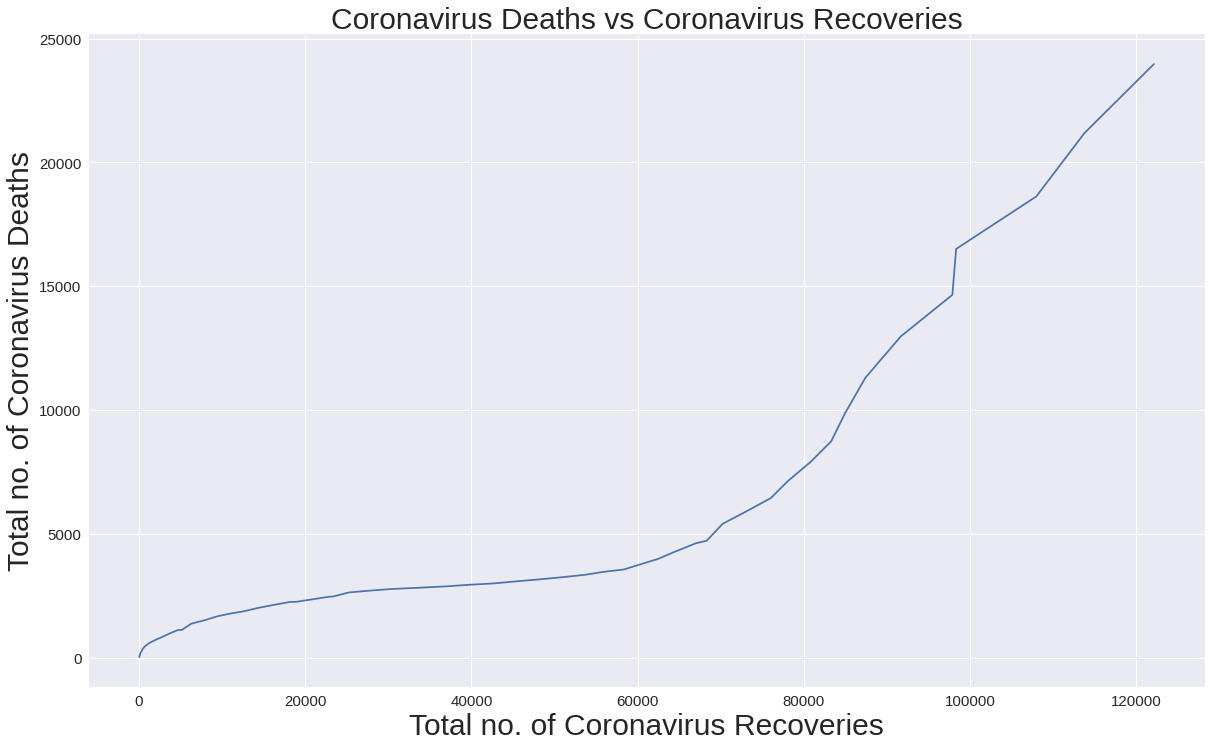

In [ ]:
#Coronavirus Deaths vs Coronavirus Recoveries

plt.figure(figsize=(20,12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total no. of Coronavirus Recoveries', size=30)
plt.ylabel('Total no. of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

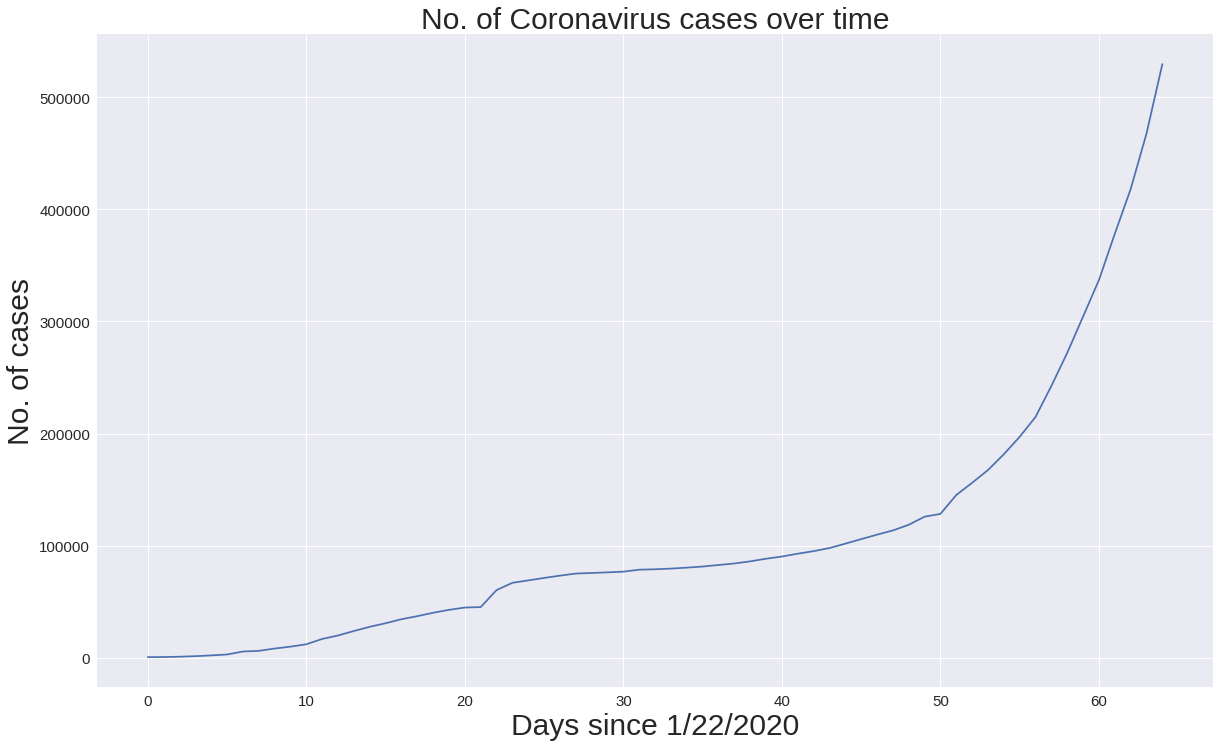

In [ ]:
#Total no. of coronavirus cases over time 

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('No. of Coronavirus cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

**SVM Model**

In [ ]:
#Splitting into test set and train set

from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, world_cases, test_size=0.15, shuffle=False)

In [ ]:
#Building SVM model

kernel = ['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking =[True,False]
svm_grid = {'kernel': kernel, 'C' : c, 'gamma' : gamma, 'epsilon' : epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
svm_search.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly', 'shrinking': False}

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_predict = svm_confirmed.predict(future_forecast)

In [ ]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [ ]:
svm_predict

array([ 38634.01358152,  38634.75511851,  38639.94587745,  38654.03508028,
        38681.47194896,  38726.70570542,  38794.18557162,  38888.3607695 ,
        39013.68052101,  39174.5940481 ,  39375.55057272,  39620.99931681,
        39915.38950231,  40263.17035118,  40668.79108537,  41136.70092682,
        41671.34909747,  42277.18481928,  42958.65731419,  43720.21580415,
        44566.30951111,  45501.38765701,  46529.8994638 ,  47656.29415343,
        48885.02094785,  50220.529069  ,  51667.26773883,  53229.68617928,
        54912.23361231,  56719.35925987,  58655.51234389,  60725.14208632,
        62932.69770912,  65282.62843423,  67779.3834836 ,  70427.41207917,
        73231.16344289,  76195.08679671,  79323.63136258,  82621.24636244,
        86092.38101824,  89741.48455193,  93573.00618545,  97591.39514076,
       101801.10063979, 106206.57190451, 110812.25815684, 115622.60861875,
       120642.07251217, 125875.09905906, 131326.13748136, 136999.63700103,
       142900.04683999, 1

MAE: 140206.11368787763
MSE: 26531359541.37257


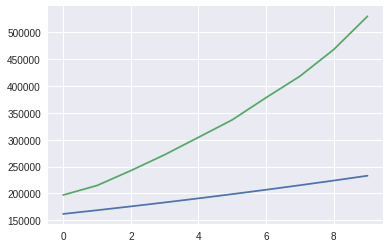

In [ ]:
#Checking against Testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

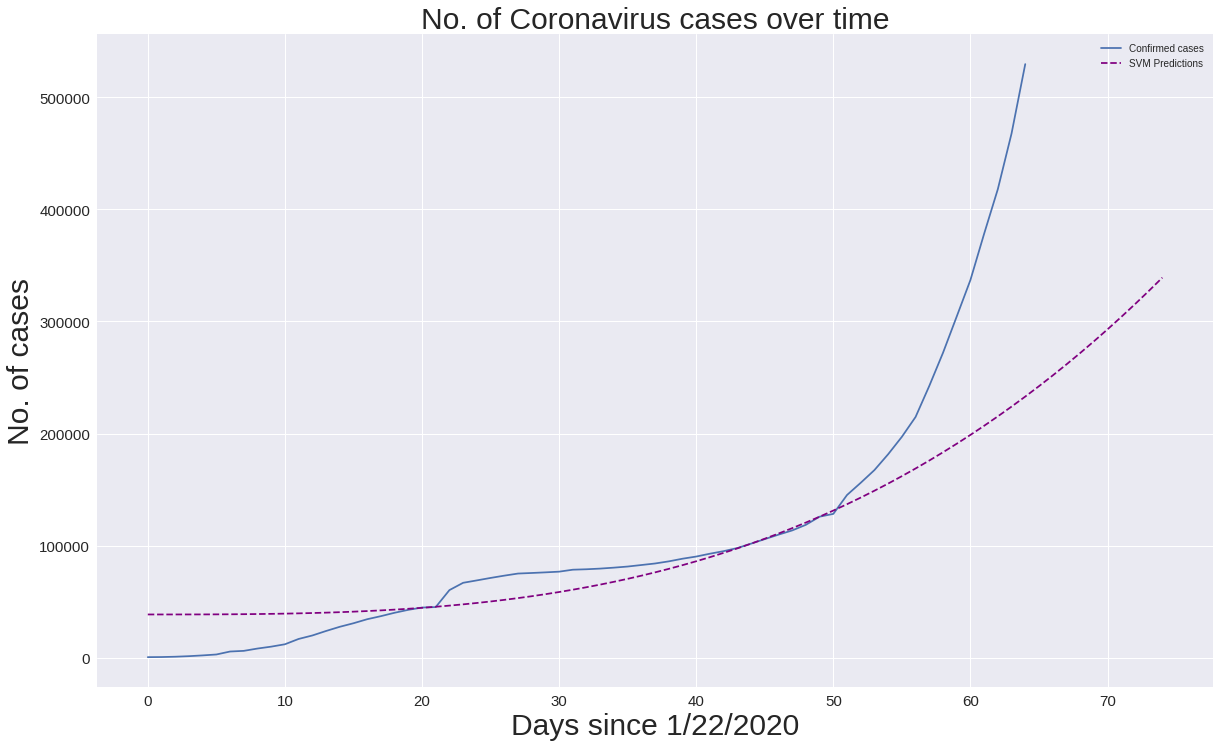

In [ ]:
#Confirmed vs SVM Predicted cases

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_predict, linestyle='dashed', color='purple')
plt.title('No. of Coronavirus cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Predictions for the next 30 days using SVM

print('SVM future predictons for 30 days:')
set(zip(future_forecast_date[-30:], svm_predict[-30:]))


SVM future predictons for 30 days:


{('03/07/2020', 106206.57190450646),
 ('03/08/2020', 110812.25815684196),
 ('03/09/2020', 115622.60861874832),
 ('03/10/2020', 120642.07251217274),
 ('03/11/2020', 125875.09905906236),
 ('03/12/2020', 131326.13748136442),
 ('03/13/2020', 136999.63700102613),
 ('03/14/2020', 142900.04683999467),
 ('03/15/2020', 149031.8162202172),
 ('03/16/2020', 155399.39436364095),
 ('03/17/2020', 162007.2304922131),
 ('03/18/2020', 168859.77382788085),
 ('03/19/2020', 175961.47359259136),
 ('03/20/2020', 183316.77900829184),
 ('03/21/2020', 190930.13929692953),
 ('03/22/2020', 198806.00368045154),
 ('03/23/2020', 206948.8213808051),
 ('03/24/2020', 215363.04161993752),
 ('03/25/2020', 224053.1136197957),
 ('03/26/2020', 233023.48660232715),
 ('03/27/2020', 242278.60978947888),
 ('03/28/2020', 251822.9324031981),
 ('03/29/2020', 261660.903665432),
 ('03/30/2020', 271796.97279812786),
 ('03/31/2020', 282235.5890232327),
 ('04/01/2020', 292981.201562694),
 ('04/02/2020', 304038.2596384588),
 ('04/03/202

**Linear Regression Model**

In [ ]:
#Using Linear Regression model to make the predictions

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 178406.68524531025
MSE: 41317024717.9059


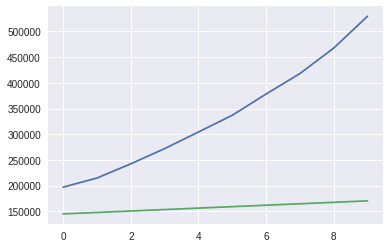

In [ ]:
#Confirmed vs predicted

plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

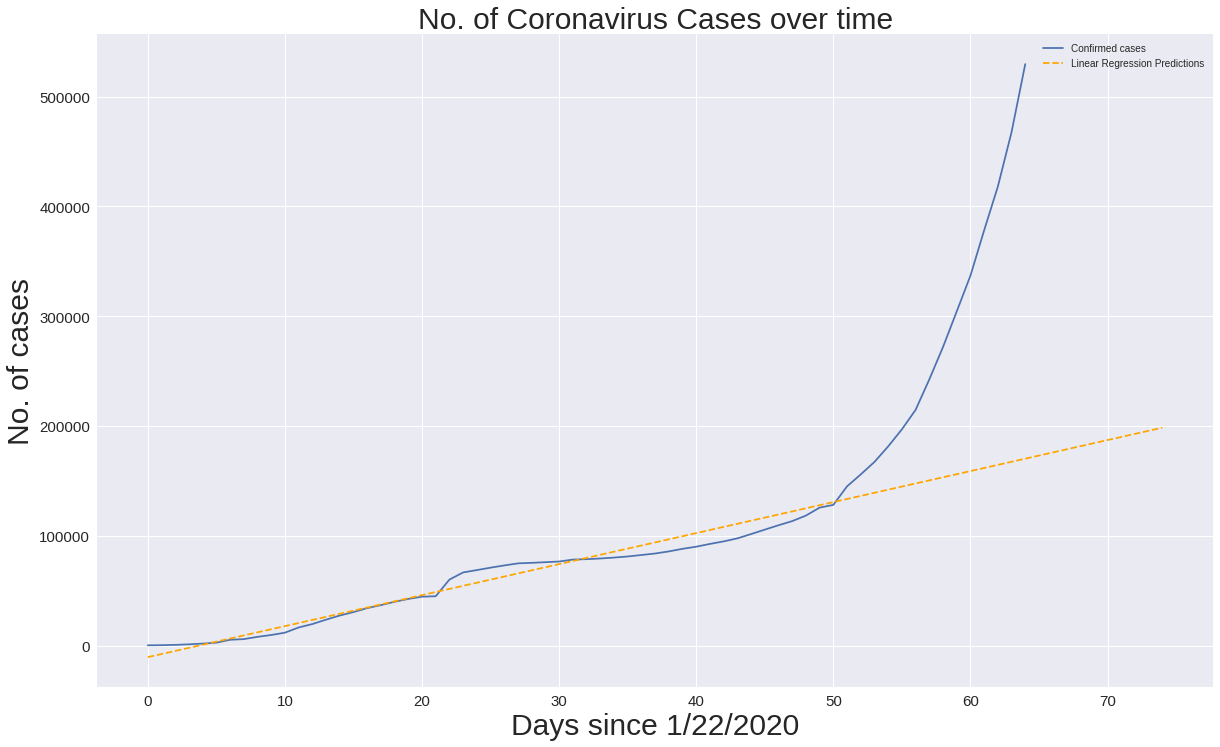

In [ ]:
#Total no. of coronavirus cases over time (Confirmed vs Linear Regression Predicted)

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('No. of Coronavirus Cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Prediction for the next 30 days using Linear Regression

print('Linear regression future prediction:')
print(linear_pred[-30:])

Linear regression future prediction:
[[116794.84285714]
 [119617.70988456]
 [122440.57691198]
 [125263.44393939]
 [128086.31096681]
 [130909.17799423]
 [133732.04502165]
 [136554.91204906]
 [139377.77907648]
 [142200.6461039 ]
 [145023.51313131]
 [147846.38015873]
 [150669.24718615]
 [153492.11421356]
 [156314.98124098]
 [159137.8482684 ]
 [161960.71529582]
 [164783.58232323]
 [167606.44935065]
 [170429.31637807]
 [173252.18340548]
 [176075.0504329 ]
 [178897.91746032]
 [181720.78448773]
 [184543.65151515]
 [187366.51854257]
 [190189.38556999]
 [193012.2525974 ]
 [195835.11962482]
 [198657.98665224]]


**Logistic Regression Model**

In [ ]:
#Using Logistic Regression model to make the predictions

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_confirmed, y_train_confirmed)
test_logistic_pred = logistic_model.predict(X_test_confirmed)
logistic_pred = logistic_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_logistic_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_logistic_pred, y_test_confirmed))

MAE: 154559.1
MSE: 35002063840.7


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


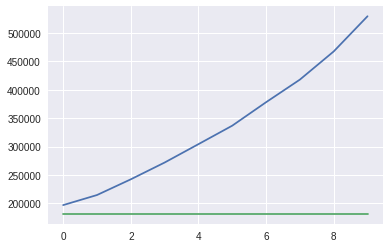

In [ ]:
#Confirmed vs predicted

plt.plot(y_test_confirmed)
plt.plot(test_logistic_pred)

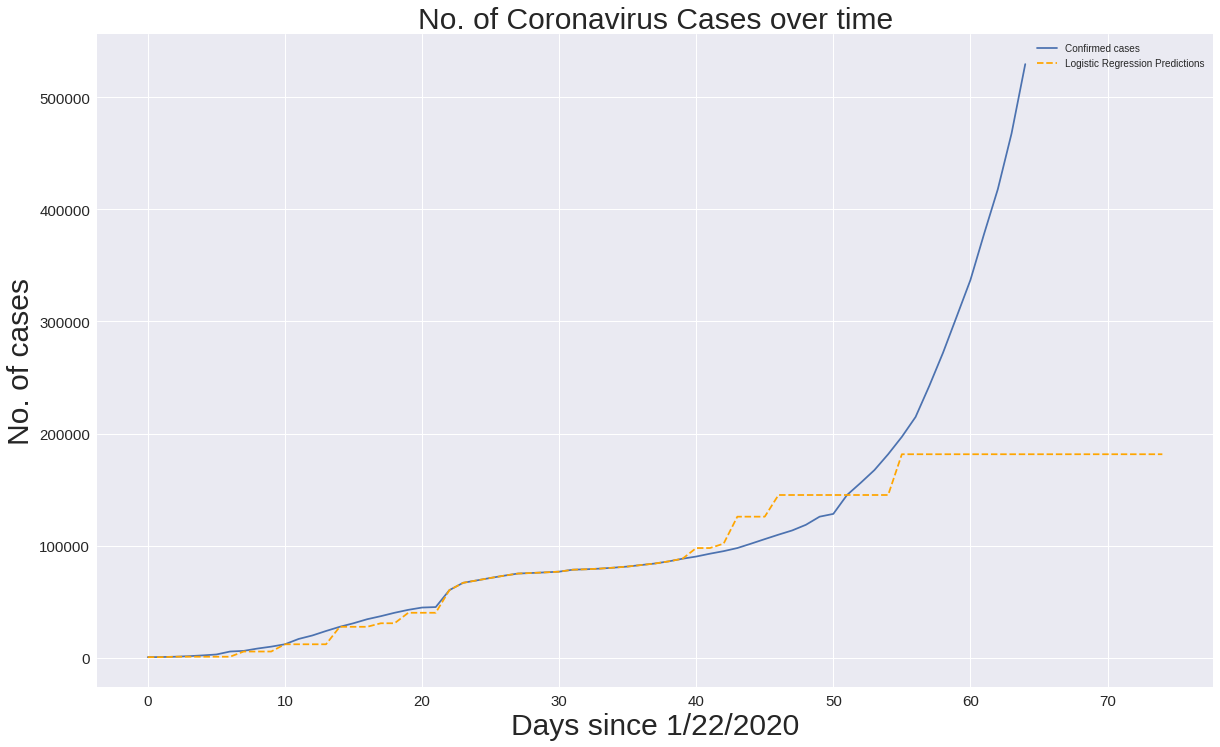

In [ ]:
#Total no. of coronavirus cases over time 

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, logistic_pred, linestyle='dashed', color='orange')
plt.title('No. of Coronavirus Cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'Logistic Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Prediction for the next 30 days using Logistic Regression

print('Logistic regression future prediction:')
print(logistic_pred[-30:])

Logistic regression future prediction:
[125875 145205 145205 145205 145205 145205 145205 145205 145205 145205
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574]


**Gaussian Naive Bayes Model**

In [ ]:
#Using Gaussian Naive Bayes model to make the predictions

from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train_confirmed, y_train_confirmed)
test_GNB_pred = GNB_model.predict(X_test_confirmed)
GNB_pred = GNB_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_GNB_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_GNB_pred, y_test_confirmed))

MAE: 154559.1
MSE: 35002063840.7


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


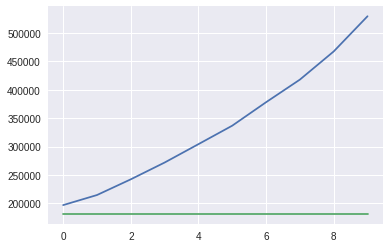

In [ ]:
#Confirmed vs predicted

plt.plot(y_test_confirmed)
plt.plot(test_GNB_pred)

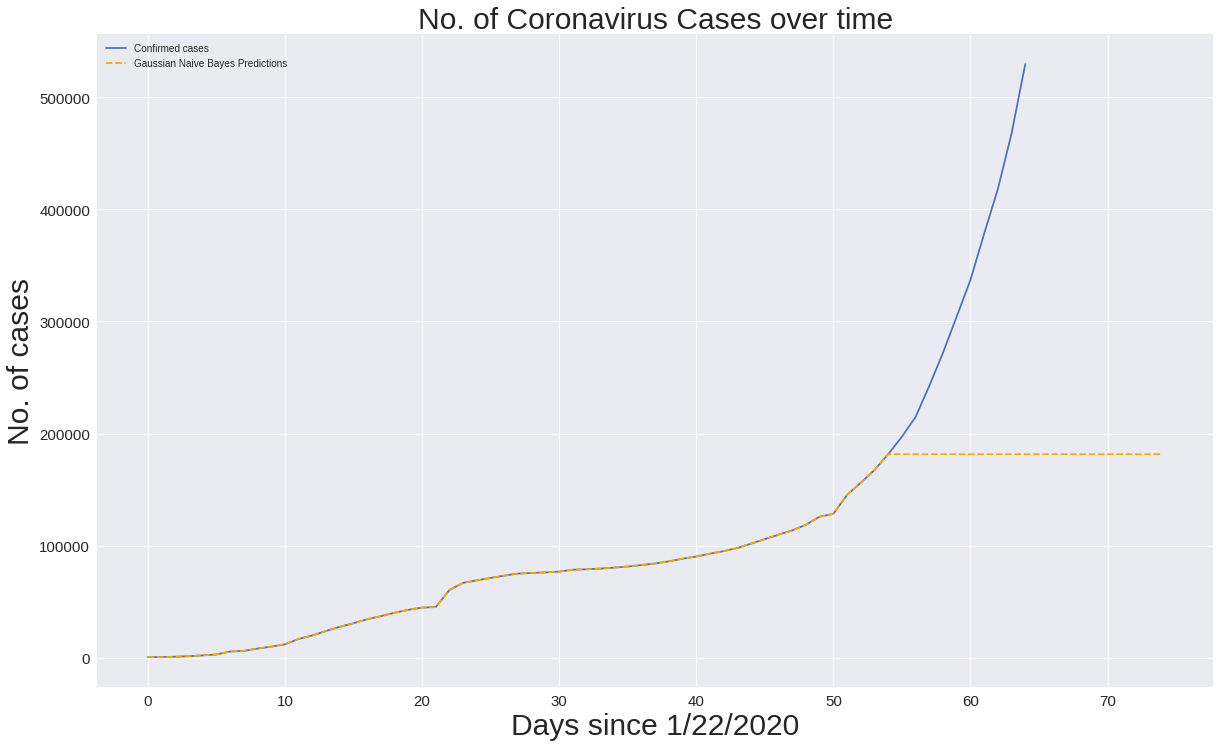

In [ ]:
#Total no. of coronavirus cases over time 

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, GNB_pred, linestyle='dashed', color='orange')
plt.title('No. of Coronavirus Cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'Gaussian Naive Bayes Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Prediction for the next 30 days using Gaussian Naive Bayes

print('Gaussian Naive Bayes future prediction:')
print(GNB_pred[-30:])

Gaussian Naive Bayes future prediction:
[105847 109821 113590 118620 125875 128352 145205 156101 167454 181574
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574]


**Decision Tree Regressor Model**

In [ ]:
#Using Decision Tree Regressor Model to make the predictions

from sklearn.tree import DecisionTreeRegressor 
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train_confirmed, y_train_confirmed)
test_DTR_pred = DTR_model.predict(X_test_confirmed)
DTR_pred = DTR_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_DTR_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_DTR_pred, y_test_confirmed))

MAE: 154559.1
MSE: 35002063840.7


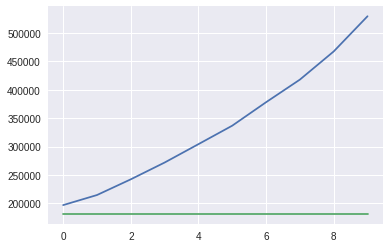

In [ ]:
#Confirmed vs predicted

plt.plot(y_test_confirmed)
plt.plot(test_DTR_pred)

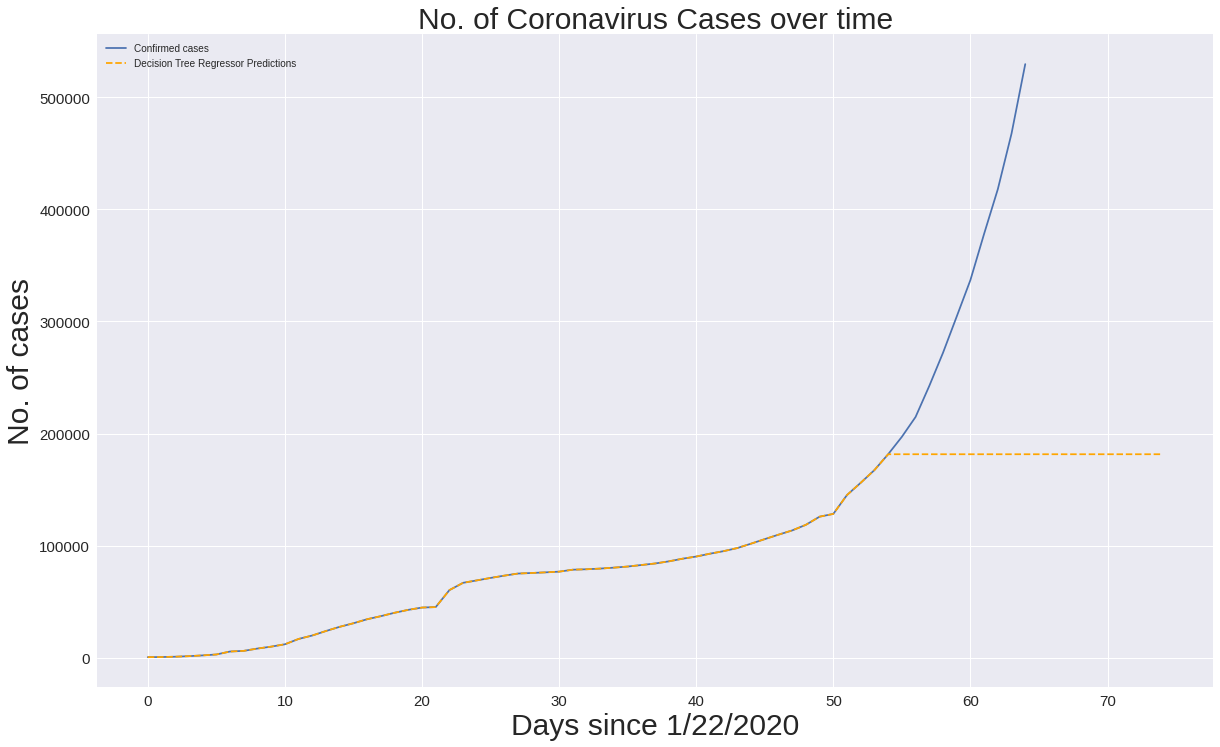

In [ ]:
#Total no. of coronavirus cases over time 

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, DTR_pred, linestyle='dashed', color='orange')
plt.title('No. of Coronavirus Cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'Decision Tree Regressor Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Prediction for the next 30 days using Decision Tree Regressor Model

print('Decision Tree Regressor Model future prediction:')
print(DTR_pred[-30:])

Decision Tree Regressor Model future prediction:
[105847. 109821. 113590. 118620. 125875. 128352. 145205. 156101. 167454.
 181574. 181574. 181574. 181574. 181574. 181574. 181574. 181574. 181574.
 181574. 181574. 181574. 181574. 181574. 181574. 181574. 181574. 181574.
 181574. 181574. 181574.]


**Random Forest Classifier Model**

In [ ]:
#Using Random Forest Classifier Model to make the predictions

from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_confirmed, y_train_confirmed)
test_RFC_pred = RFC_model.predict(X_test_confirmed)
RFC_pred = RFC_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_RFC_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_RFC_pred, y_test_confirmed))

MAE: 154559.1
MSE: 35002063840.7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


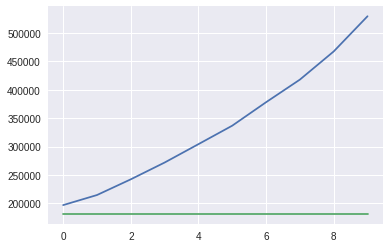

In [ ]:
#Confirmed vs predicted

plt.plot(y_test_confirmed)
plt.plot(test_RFC_pred)

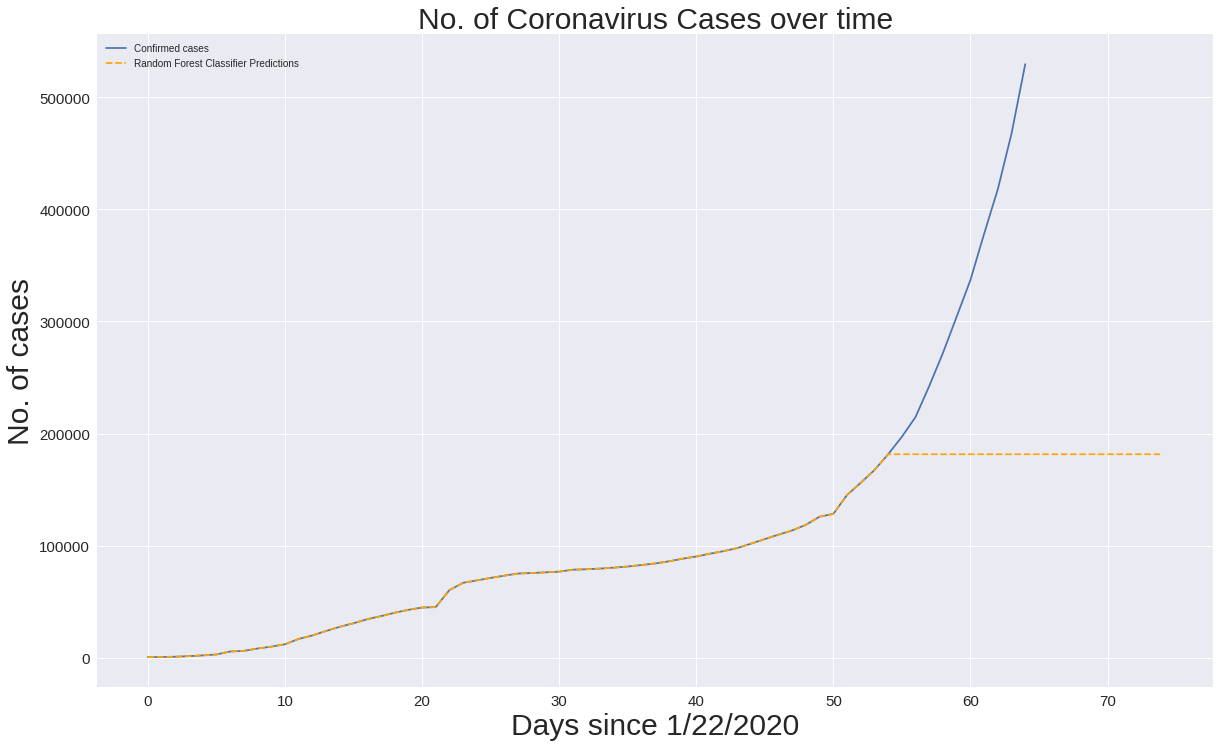

In [ ]:
#Total no. of coronavirus cases over time 

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, RFC_pred, linestyle='dashed', color='orange')
plt.title('No. of Coronavirus Cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('No. of cases', size=30)
plt.legend(['Confirmed cases', 'Random Forest Classifier Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
#Prediction for the next 30 days using Random Forest Classifier Model

print('Random Forest Classifier Model future prediction:')
print(RFC_pred[-30:])

Random Forest Classifier Model future prediction:
[105847 109821 113590 118620 125875 128352 145205 156101 167454 181574
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574
 181574 181574 181574 181574 181574 181574 181574 181574 181574 181574]


**Accuracy Comparison of Models**

In [ ]:
#SVM
from sklearn.metrics import r2_score
score1=r2_score(y_test_confirmed,svm_test_pred)

In [ ]:
#Linear Regression
score2=r2_score(y_test_confirmed,test_linear_pred)

In [ ]:
#Logistic Regression
score3=r2_score(y_test_confirmed,test_logistic_pred)

In [ ]:
#GNB
score4=r2_score(y_test_confirmed,test_GNB_pred)

In [ ]:
#DTR
score5=r2_score(y_test_confirmed,test_DTR_pred)

In [ ]:
#RFC
score6=r2_score(y_test_confirmed,test_RFC_pred)

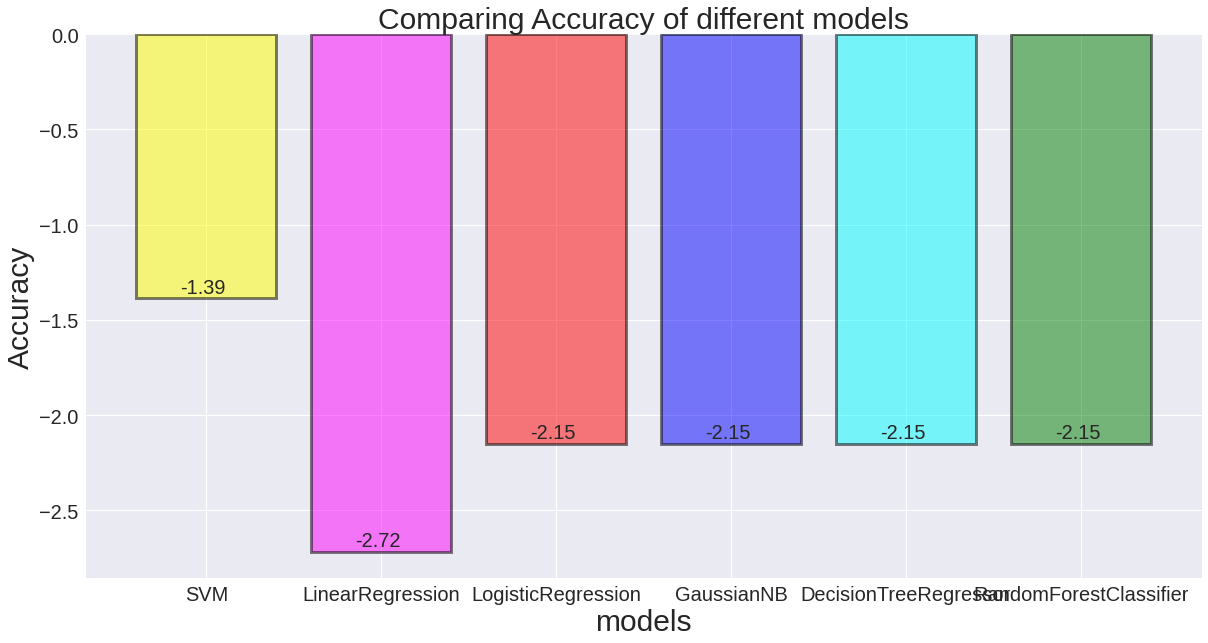

In [ ]:
scores=[score1,score2,score3,score4,score5,score6]
models=['SVM','LinearRegression','LogisticRegression','GaussianNB','DecisionTreeRegressor','RandomForestClassifier']
plt.figure(figsize=(20,10))
plt.title('Comparing Accuracy of different models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['yellow','magenta','red','blue','cyan','green'],alpha=0.5,linewidth=3,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=20)